In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Chi-Square Test for Homogeneity

We use the Chi-Square Test for Homogeneity when we want to test multiple independent different data sets to see if they are drawn from the same discrete distribution.

|   |Vaccinated   |Not Vaccinated   |
|---|---|---|
|Post-Graduate Degree   |  26,188 |  5,856 |
| College Degree  |  6,776 |  14,599 |
|  < College Degree |  335,998 |  76,193 |

Rejection Region: Greater than 5.99


Text(0.5, 0.92, 'Chi-Square Distribution with 10 Degrees of Freedom')

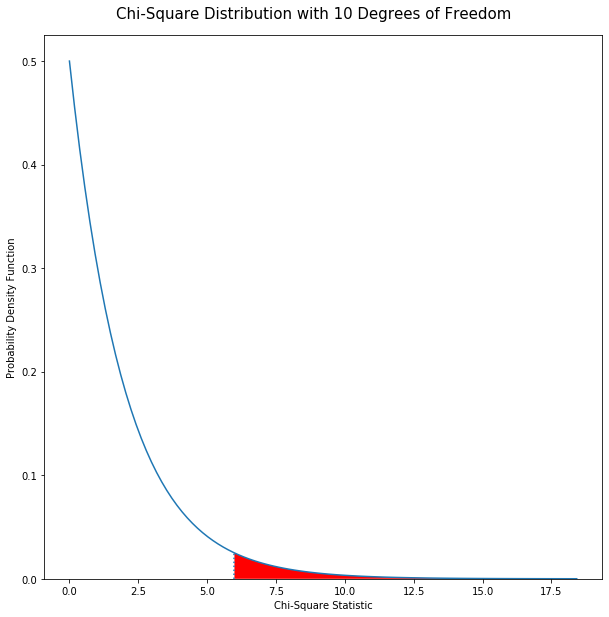

In [2]:
dist = stats.chi2(df=2)
print('Rejection Region: Greater than', np.round(dist.ppf(0.95), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density Function')
fig.suptitle('Chi-Square Distribution with 10 Degrees of Freedom', fontsize=15, y=0.92)

In [3]:
stats.chi2_contingency([[26118, 67776, 335998], [5856, 14599, 76193]])

(26.656285207184467,
 1.6280255382971824e-06,
 2,
 array([[ 26105.07617275,  67254.82109621, 336532.10273104],
        [  5868.92382725,  15120.17890379,  75658.89726896]]))

# Removing Outliers

In [4]:
#If your dataset is locally loaded rather than from the internet, make sure it's included with your submission.
education = pd.read_csv('data/Education.csv', encoding='ISO-8859-1', header=0)
education = education[["State", "Area name",
"Percent of adults with a bachelor's degree or higher, 2000",  
"Percent of adults with a bachelor's degree or higher, 2013-17"]]
education.columns = ['State', 'County', 'Bachelor_2000', 'Bachelor_2015']
education['Bachelor_Diff'] = education['Bachelor_2015'] - education['Bachelor_2000']
education = education.iloc[:, :-1]
education = education.dropna().reset_index(drop=True)
state_grouped = education.groupby('State').mean().reset_index()
state_grouped['Bachelor_Diff'] = state_grouped["Bachelor_2015"] - state_grouped["Bachelor_2000"]

Text(0.5, 0.92, "% of Adults With a Bachelor's Degree Per State in 2000 and 2015")

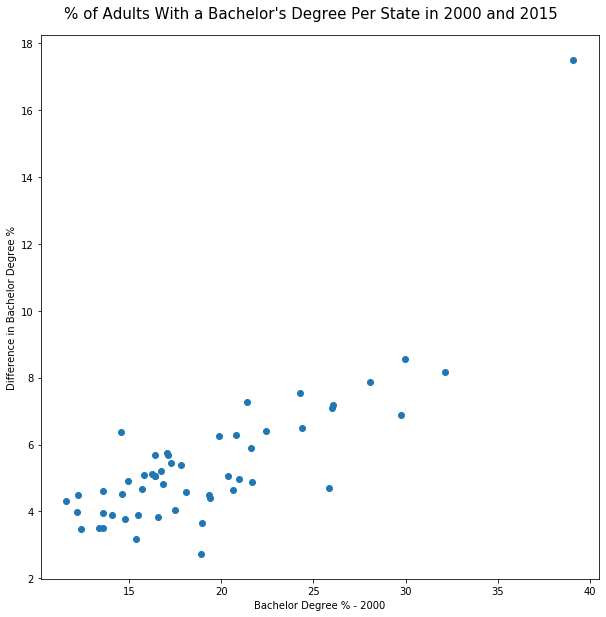

In [5]:
fig = plt.figure(figsize=(10,10))
plt.scatter(state_grouped['Bachelor_2000'], state_grouped['Bachelor_Diff'])
plt.ylabel("Difference in Bachelor Degree %")
plt.xlabel("Bachelor Degree % - 2000")
fig.suptitle("% of Adults With a Bachelor's Degree Per State in 2000 and 2015", fontsize=15, y=0.92)

In [6]:
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

In [7]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(state_grouped['Bachelor_2000'],
                                                                        state_grouped['Bachelor_Diff'])

Text(0.5, 0.92, "% of Adults With a Bachelor's Degree Per State in 2000 and 2015")

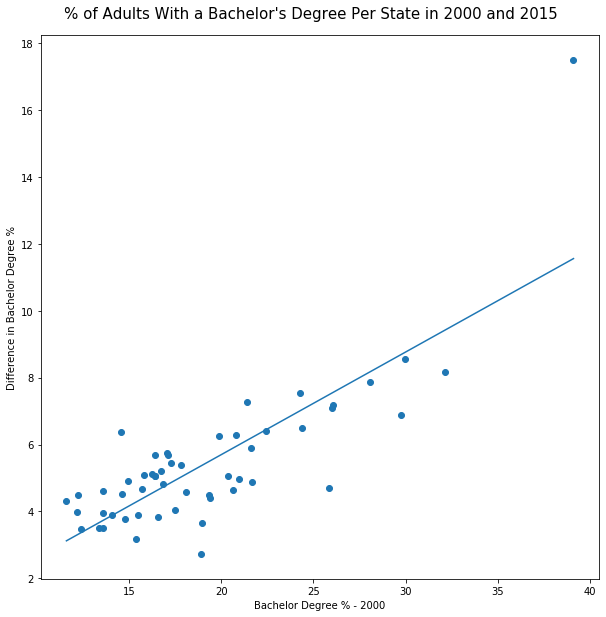

In [8]:
fig = plt.figure(figsize=(10,10))
plt.scatter(state_grouped['Bachelor_2000'], state_grouped['Bachelor_Diff'])
sorted_order = np.argsort(state_grouped['Bachelor_2000'])
plt.plot(state_grouped['Bachelor_2000'][sorted_order], predictions[sorted_order])
plt.ylabel("Difference in Bachelor Degree %")
plt.xlabel("Bachelor Degree % - 2000")
fig.suptitle("% of Adults With a Bachelor's Degree Per State in 2000 and 2015", fontsize=15, y=0.92)

In [9]:
print('Intercept', intercept)
print('Slope', slope)

Intercept -0.4399088120531731
Slope 0.30697020240992196


In [10]:
#R-Squared Value
np.var(predictions) / np.var(state_grouped['Bachelor_Diff'])

0.642614928887142

In [11]:
np.var(predictions)

2.942075959477082

In [12]:
np.var(state_grouped['Bachelor_Diff'])

4.578287598409931

Text(0.5, 0.92, 'Residuals')

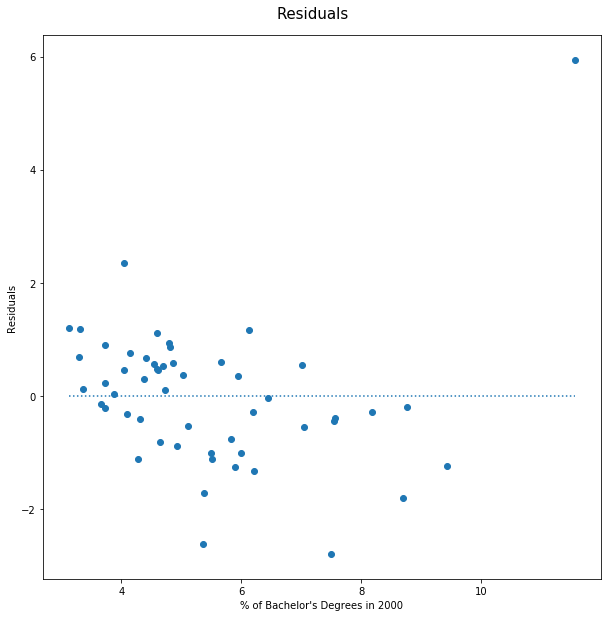

In [13]:
fig = plt.figure(figsize=(10,10))
plt.scatter(predictions, residuals)
plt.plot([predictions.min(), predictions.max()], [0,0], linestyle='dotted')
plt.xlabel("% of Bachelor's Degrees in 2000")
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

In [14]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(state_grouped[state_grouped['State'] != 'DC']['Bachelor_2000'],
                                                                        state_grouped[state_grouped['State'] != 'DC']['Bachelor_Diff'])

/Users/evanagovino/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Text(0.5, 0.92, "% of Adults With a Bachelor's Degree Per State in 2000 and 2015")

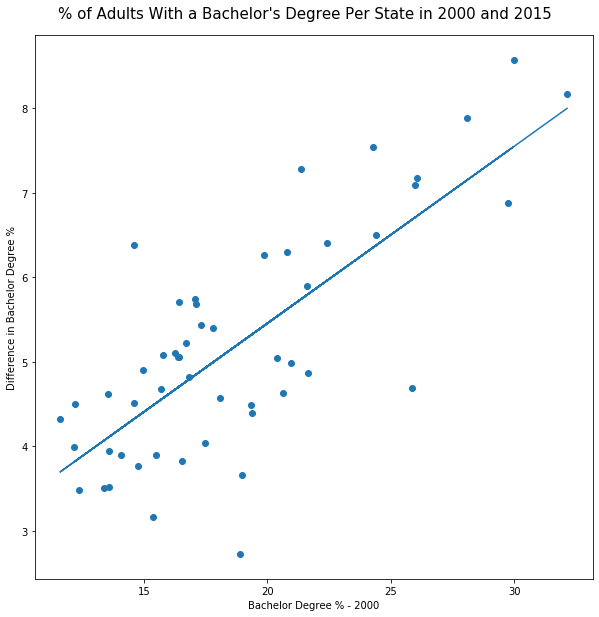

In [15]:
fig = plt.figure(figsize=(10,10))
plt.scatter(state_grouped[state_grouped['State'] != 'DC']['Bachelor_2000'], state_grouped[state_grouped['State'] != 'DC']['Bachelor_Diff'])
sorted_order = np.argsort(state_grouped[state_grouped['State'] != 'DC']['Bachelor_2000'])
plt.plot(state_grouped[state_grouped['State'] != 'DC']['Bachelor_2000'][sorted_order], predictions[sorted_order])
plt.ylabel("Difference in Bachelor Degree %")
plt.xlabel("Bachelor Degree % - 2000")
fig.suptitle("% of Adults With a Bachelor's Degree Per State in 2000 and 2015", fontsize=15, y=0.92)

In [16]:
print('Intercept', intercept)
print('Slope', slope)

Intercept 1.264479344426137
Slope 0.20957201261594835


In [17]:
#R-Squared Value
np.var(predictions) / np.var(state_grouped[state_grouped['State'] != 'DC']['Bachelor_Diff'])

0.5839094948737834

In [18]:
np.var(predictions)

1.0518253338129582

In [19]:
np.var(state_grouped[state_grouped['State'] != 'DC']['Bachelor_Diff'])

1.8013499404395168

Text(0.5, 0.92, 'Residuals')

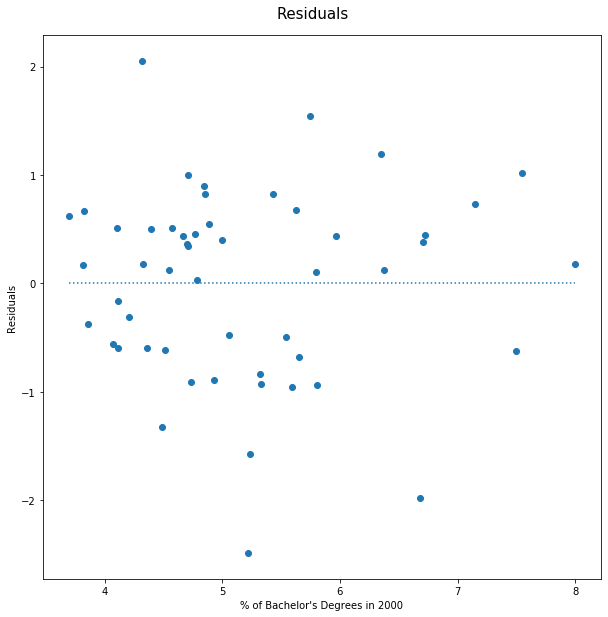

In [20]:
fig = plt.figure(figsize=(10,10))
plt.scatter(predictions, residuals)
plt.plot([predictions.min(), predictions.max()], [0,0], linestyle='dotted')
plt.xlabel("% of Bachelor's Degrees in 2000")
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

Note that R-squared is actually lower in the prediction *without* the outlier than it is in the prediction with the outlier. This again captures the idea that R-squared is not the be-all end-all metric for evaluating the performance of a linear model. Additionally, the residuals of the first model appear to have a pttern (there are no residuals greater than 0 after a certain point, while the residuals for the second model appear to be randomly distributed on both sides of 0, thus meaning that the predictions 'cut through' the data more effectively.

In [47]:
# State columns in DataFrame
column_names = list(education.columns)

In [51]:
education[column_names].head()

,State,County,Bachelor_2000,Bachelor_2015
0,US,United States,24.4,30.9
1,AL,Alabama,19.0,24.5
2,AL,Autauga County,18.0,25.0
3,AL,Baldwin County,23.1,30.7
4,AL,Barbour County,10.9,12.0


In [44]:
#Only Keep Listed Columns (be sure to set this to a variable)
new_df = education[['State', 'County']]
new_df.head()

,State,County
0,US,United States
1,AL,Alabama
2,AL,Autauga County
3,AL,Baldwin County
4,AL,Barbour County


In [ ]:
#Rename Columns
new_df.columns = ['Stateasdf', 'Couyntyasdf']

In [28]:
#Reference 
red_states = ['Alabama']
new_df = education[education['County'].isin(red_states)].reset_index(drop=True)

In [43]:
#Groupby and Get Max Value
education.groupby('State')['Bachelor_2000'].mean().sort_values(ascending=False).reset_index()['State'][0]

'DC'

In [39]:
#Groupby and Sort Values
education.groupby('State')['Bachelor_2000'].mean().sort_values(ascending=False)

State
DC    39.100000
MA    32.133333
RI    29.966667
CT    29.755556
NJ    28.072727
NH    26.063636
VT    25.980000
CO    25.835938
US    24.400000
MD    24.264000
DE    22.425000
CA    21.657627
NY    21.612698
HI    21.366667
WA    20.950000
ME    20.800000
WY    20.633333
UT    20.390000
VA    19.877612
MT    19.385965
OR    19.343243
AK    18.948000
NM    18.885294
KS    18.075472
MN    17.813636
ID    17.482222
WI    17.291781
SD    17.120896
PA    17.072059
FL    16.816176
NE    16.714894
AZ    16.556250
MI    16.429762
ND    16.411111
IA    16.395000
NC    16.238614
IL    15.787379
SC    15.678723
OK    15.500000
TX    15.372941
OH    14.948315
NV    14.761111
IN    14.608602
PR    14.581013
GA    14.047500
MS    13.590361
AL    13.570588
MO    13.559483
LA    13.369231
AR    12.369737
TN    12.222917
WV    12.183929
KY    11.600000
Name: Bachelor_2000, dtype: float64